In [324]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd
import joblib

import matplotlib.gridspec as gridspec

import ipywidgets as widgets
from ipywidgets import interactive, interact, HBox, Layout, VBox
from IPython.display import display

import random
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from scipy.stats import percentileofscore
import pickle # for saving

import warnings
warnings.filterwarnings("ignore")


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline

from sklearn import metrics

import matplotlib.pyplot as plt
#! pip install h2o
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import math

In [325]:
data = pd.read_csv('C:/Users/truon/Downloads/AI/Auto_Insurance_Claims_Sample.csv')

In [326]:
print(data.shape)

(9134, 26)


In [327]:
data.head(n=3)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize


# Missing values detection

In [328]:
len(data[data.isnull().any(axis=1)]) 

0

There is no missing values.

# Qualitative variables

In [329]:
##### Qualitative variables description

data[data.dtypes[data.dtypes=='object'].index].describe()


,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,1,5,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,SG32258,US,MO,Missouri,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Four-Door Car,Medsize
freq,1,9134,3150,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


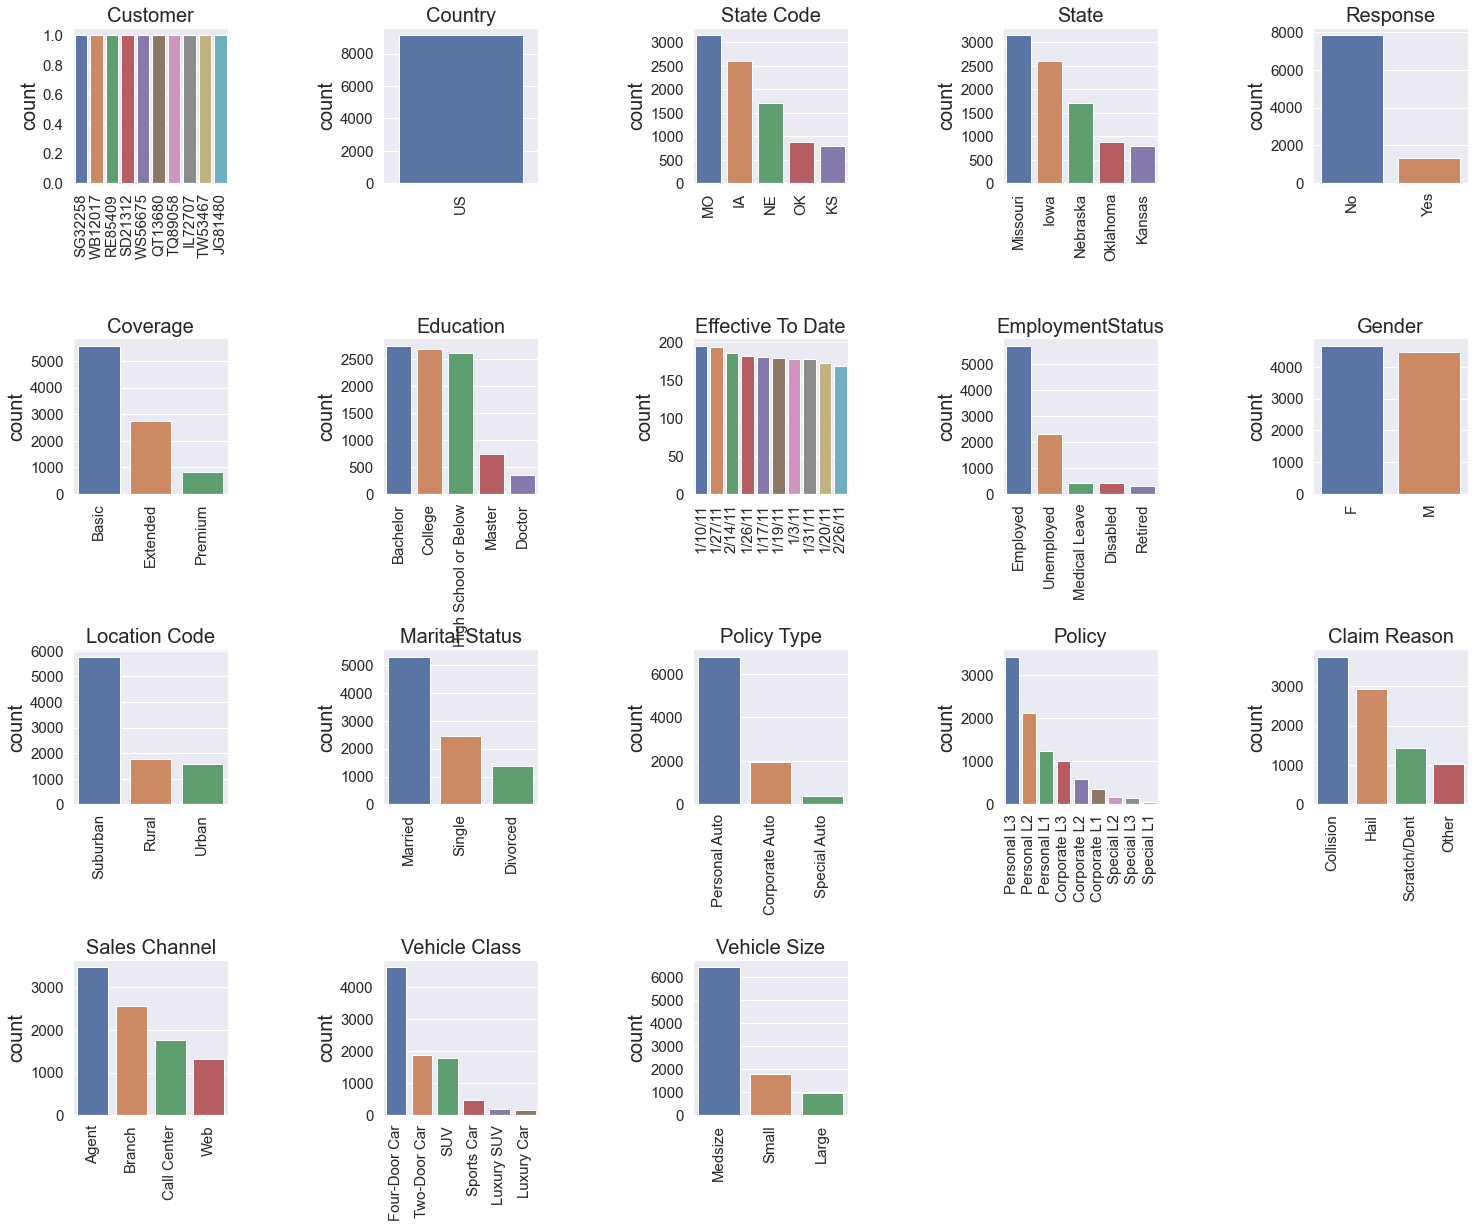

In [330]:
##### Display qualitative variables

plt.figure(figsize=(25, 20))
for i in enumerate(data.dtypes[data.dtypes=='object'].index):
    plt.subplots_adjust(hspace=1, wspace=1)
    plt.subplot(4, 5, i[0] + 1)
    sns.barplot(y=data[i[1]].value_counts()[0:10],
                x=list(data[i[1]].value_counts()[0:10].index.astype('str')))
    
    plt.title(i[1], size=20)
    plt.xlabel('', size=20)
    plt.ylabel('count', size=20)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15);
    

# Quantitative variables

In [331]:
##### Quatitative variables description

data[data.dtypes[(data.dtypes=='float64') | (data.dtypes=='int64') ].index].describe()


,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


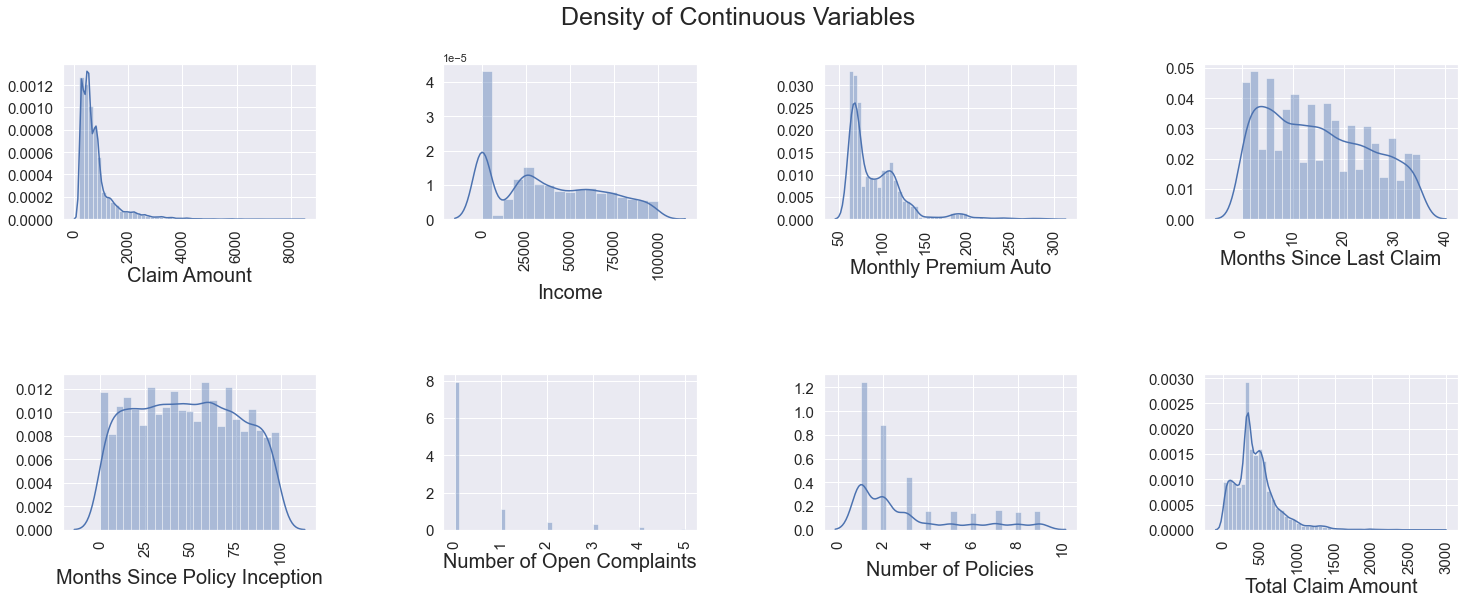

In [332]:
##### Density of numerical variables

data_num = data[data.dtypes[(data.dtypes=='float64') | (data.dtypes=='int64') ].index]
plt.figure(figsize=(25,20))
for i in enumerate(data_num.columns):
    plt.subplot(4, 4, i[0] + 1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.distplot(data_num[i[1]])
    
    plt.xlabel(i[1], size=20)
    plt.ylabel('', size=15)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15);
    
plt.suptitle('Density of Continuous Variables', size=25, y=0.92);


# Correlation matrix among variables

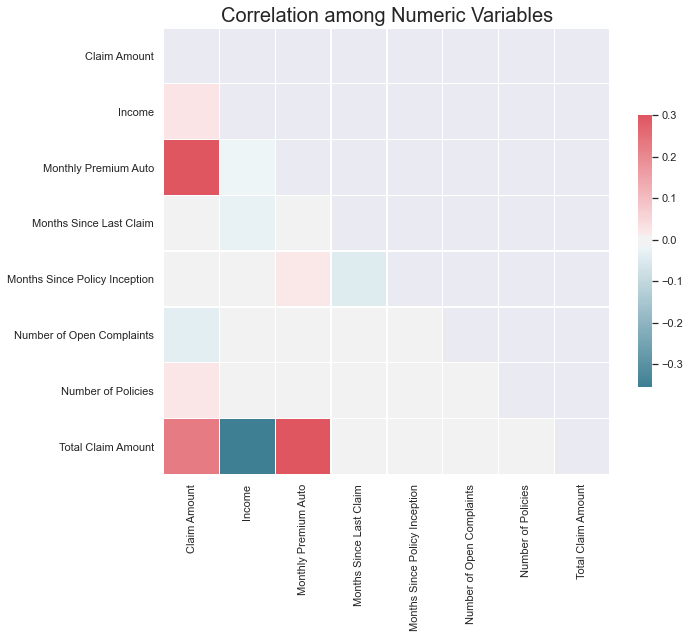

In [333]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation among Numeric Variables', size=20);

# Detect Multicolinearity using Variance Inflation Factor (VIF)¶

In [334]:
quant_set = data[data.dtypes[(data.dtypes=='float64') | (data.dtypes=='int64') ].index]
quant_VIF = quant_set[list(set(quant_set.columns).difference(set(['Total Claim Amount'])))]

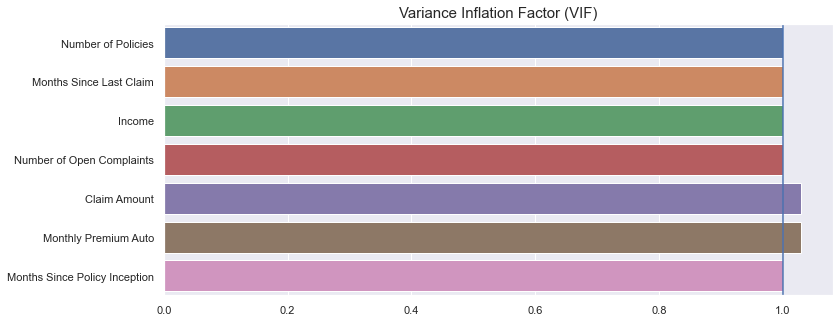

In [335]:
np.seterr(divide='ignore')
vif_list = []

for i in range(0, len(quant_VIF.columns)):
    y = quant_VIF.loc[:, quant_VIF.columns == list(quant_VIF.columns)[i]]
    X = quant_VIF.loc[:, quant_VIF.columns != list(quant_VIF.columns)[i]]
    regression = LinearRegression().fit(X, y)
    rsq = regression.score(X, y)
    vif = round(1 / (1 - rsq**2), 2)
    vif_list.append(vif)
    
vif_list_edit = [20 if x>20 else x for x in vif_list] 
plt.figure(figsize=(12,5))
sns.barplot(x=vif_list_edit, y=quant_VIF.columns)
plt.axvline(x=1)
plt.title('Variance Inflation Factor (VIF)', size=15);

In [336]:
##### Preprocessed dataset
data_cleaned = data[list(set(data.columns).difference(set(['State','Policy Type','Customer', 'Country','Effective To Date','Monthly Premium Auto', 'Claim Amount'])))]
data_cleaned.head(3)


,Response,Coverage,Vehicle Class,Gender,EmploymentStatus,Location Code,Policy,Marital Status,Vehicle Size,Number of Policies,Months Since Last Claim,Income,Sales Channel,Months Since Policy Inception,State Code,Education,Claim Reason,Number of Open Complaints,Total Claim Amount
0,No,Basic,Two-Door Car,F,Employed,Suburban,Corporate L3,Married,Medsize,1,32,56274,Agent,5,KS,Bachelor,Collision,0,384.811147
1,No,Extended,Four-Door Car,F,Unemployed,Suburban,Personal L3,Single,Medsize,8,13,0,Agent,42,NE,Bachelor,Scratch/Dent,0,1131.464935
2,No,Premium,Two-Door Car,F,Employed,Suburban,Personal L3,Married,Medsize,2,18,48767,Agent,38,OK,Bachelor,Collision,0,566.472247


In [337]:
numeric_features     = ["Income", "Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies"]
categorical_features = ["State Code","Response","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy","Claim Reason","Sales Channel","Vehicle Class","Vehicle Size"]
features = numeric_features + categorical_features

In [338]:
df_new = data_cleaned.convert_dtypes()

Text(0.5, 1.0, 'Histogramme de la variable cible')

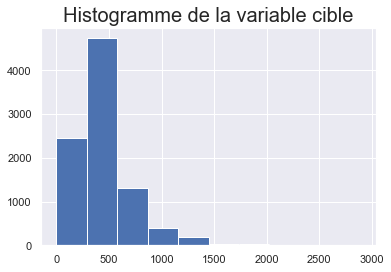

In [339]:
plt.hist(df_new['Total Claim Amount'])
plt.title('Histogramme de la variable cible', fontsize=20)

In [340]:
max(df_new['Total Claim Amount'])

2893.239678

On va supprimer les lignes qui paraissent abhérentes. Ici il n'y en as que quelques unes

In [341]:
df_new=df_new[df_new['Total Claim Amount'] < 1800]

Text(0.5, 1.0, 'Histogramme de la variable cible')

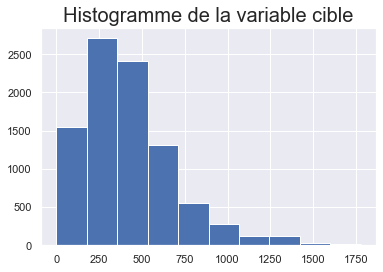

In [342]:
plt.hist(df_new['Total Claim Amount'])
plt.title('Histogramme de la variable cible', fontsize=20)

# GLM

In [343]:
# Split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(['Total Claim Amount'], axis = 1),
                                                    df_new['Total Claim Amount'],
                                                    test_size = 0.2,
                                                    random_state = 42)

df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [344]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,7 hours 28 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_truon_k1y84i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.623 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [345]:
data_h2o = h2o.H2OFrame(df_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [346]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9098 entries, 0 to 9133
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Response                       9098 non-null   string 
 1   Coverage                       9098 non-null   string 
 2   Vehicle Class                  9098 non-null   string 
 3   Gender                         9098 non-null   string 
 4   EmploymentStatus               9098 non-null   string 
 5   Location Code                  9098 non-null   string 
 6   Policy                         9098 non-null   string 
 7   Marital Status                 9098 non-null   string 
 8   Vehicle Size                   9098 non-null   string 
 9   Number of Policies             9098 non-null   Int64  
 10  Months Since Last Claim        9098 non-null   Int64  
 11  Income                         9098 non-null   Int64  
 12  Sales Channel                  9098 non-null   s

In [347]:
data_h2o['EmploymentStatus'] = data_h2o['EmploymentStatus'].asfactor()
data_h2o['Location Code'] = data_h2o['Location Code'].asfactor()
data_h2o['Sales Channel'] = data_h2o['Sales Channel'].asfactor()
data_h2o['Gender'] = data_h2o['Gender'].asfactor()
data_h2o['Marital Status'] = data_h2o['Marital Status'].asfactor()
data_h2o['Policy'] = data_h2o['Policy'].asfactor()
data_h2o['State Code'] = data_h2o['State Code'].asfactor()
data_h2o['Education'] = data_h2o['Education'].asfactor()
data_h2o['Vehicle Size'] = data_h2o['Vehicle Size'].asfactor()
data_h2o['Coverage'] = data_h2o['Coverage'].asfactor()
data_h2o['Response'] = data_h2o['Response'].asfactor()
data_h2o['Claim Reason'] = data_h2o['Claim Reason'].asfactor()
data_h2o['Vehicle Class'] = data_h2o['Vehicle Class'].asfactor()

In [348]:
predictors = data_h2o.names
del predictors[6]

In [349]:
response = 'Total Claim Amount'

In [350]:
glm_model = H2OGeneralizedLinearEstimator(family= "gamma",
                                          lambda_search = True,
                                          alpha = 0.5)
glm_model.train(predictors, response, training_frame= data_h2o)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [351]:
data_h2o_test = h2o.H2OFrame(df_test)
data_h2o_test['EmploymentStatus'] = data_h2o_test['EmploymentStatus'].asfactor()
data_h2o_test['Location Code'] = data_h2o_test['Location Code'].asfactor()
data_h2o_test['Sales Channel'] = data_h2o_test['Sales Channel'].asfactor()
data_h2o_test['Gender'] = data_h2o_test['Gender'].asfactor()
data_h2o_test['Marital Status'] = data_h2o_test['Marital Status'].asfactor()
data_h2o_test['Policy'] = data_h2o_test['Policy'].asfactor()
data_h2o_test['State Code'] = data_h2o_test['State Code'].asfactor()
data_h2o_test['Education'] = data_h2o_test['Education'].asfactor()
data_h2o_test['Vehicle Size'] = data_h2o_test['Vehicle Size'].asfactor()
data_h2o_test['Coverage'] = data_h2o_test['Coverage'].asfactor()
data_h2o_test['Response'] = data_h2o_test['Response'].asfactor()
data_h2o_test['Claim Reason'] = data_h2o_test['Claim Reason'].asfactor()
data_h2o_test['Vehicle Class'] = data_h2o_test['Vehicle Class'].asfactor()


predict = glm_model.predict(data_h2o_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


In [352]:
pred = predict.as_data_frame()['predict']

In [353]:
perf = glm_model.model_performance(data_h2o_test)
perf


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 20931.527157002944
RMSE: 144.6773208108408
MAE: 92.67223981363689
RMSLE: 0.46046995187707473
R^2: 0.7219298544277055
Mean Residual Deviance: 0.16603992818166796
Null degrees of freedom: 1819
Residual degrees of freedom: 1786
Null deviance: 985.128834970863
Residual deviance: 302.1926692906357
AIC: NaN


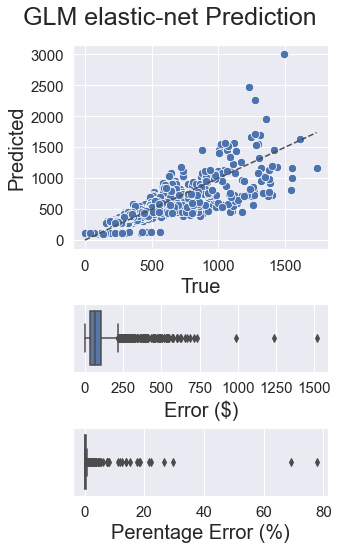

In [354]:
fig = plt.figure(constrained_layout=True, figsize=(12, 7))
gs = fig.add_gridspec(5, 3)
fig.suptitle('GLM elastic-net Prediction', size=25, y=1.07)

# True v.s. Predicted
##################################################
fig_ax1 = fig.add_subplot(gs[0:3, 1])
sns.scatterplot(x=y_test,
                y=np.array(pred),
                s=70);
plt.xlabel('True', size=20)
plt.ylabel('Predicted', size=20)
plt.title('', size=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], ls="--", c=".3");


# Boxplot
##################################################
GLM_error = np.abs(y_test - np.array(pred))
GLM_error_percent = np.abs(y_test - np.array(pred)) / y_test

RMSE_GLM = math.sqrt(np.mean((y_test - np.array(pred))**2))

fig_ax4 = fig.add_subplot(gs[3, 1])
sns.boxplot(x = GLM_error)
plt.xlabel('Error ($)', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


fig_ax4 = fig.add_subplot(gs[4, 1])
sns.boxplot(x=GLM_error_percent)
plt.xlabel('Perentage Error (%)', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

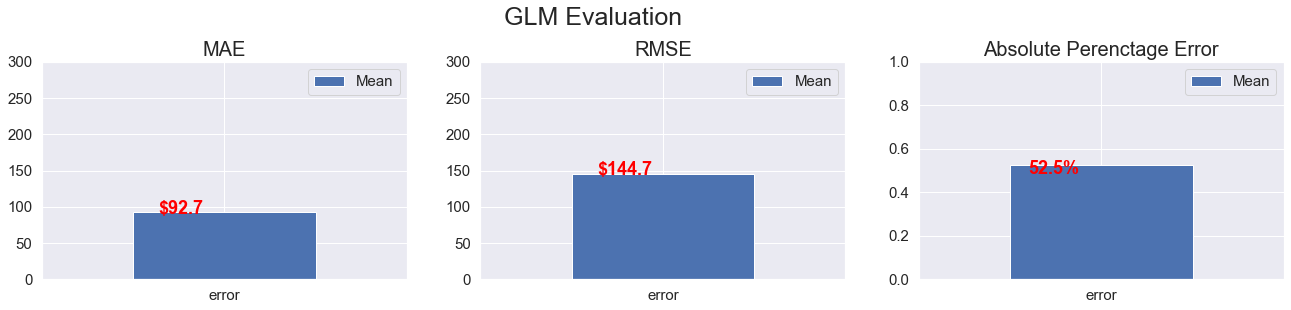

In [356]:
# Summary table
############################################################
GLM_summary = pd.DataFrame({'error' : [np.mean(GLM_error),
                                       np.percentile(GLM_error, 95),
                                       np.mean(GLM_error_percent),
                                       np.percentile(GLM_error_percent, 95),
                                       RMSE_GLM]})


GLM_summary.rename(index={0 : 'MAE',
                          1 : '95% Confidence MAE',
                          2 : 'MAPE',
                          3 : '95% Confidence MAPE',
                          4 : 'RMSE_GLM'}, inplace=True)


# Figure
############################################################
fig, axes = plt.subplots(1, 3)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
#ax1 = GLM_summary.loc[['MAE', '95% Confidence MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
ax1 = GLM_summary.loc[['MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#for i, v in enumerate(GLM_summary.loc['95% Confidence MAE', :] + GLM_summary.loc['MAE',:]):
#        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18)
for i, v in enumerate(GLM_summary.loc['MAE']):
        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18, color='red')
ax1.set_title('MAE', size=20)
ax1.legend(['Mean'], prop={'size': 15})
ax1.set_ylim(0, 300)
ax1.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(right=2)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
#ax1 = GLM_summary.loc[['MAE', '95% Confidence MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
ax2 = GLM_summary.loc[['RMSE_GLM'], :].T.plot(ax=axes[1], kind="bar", stacked=True, rot=0)

#for i, v in enumerate(GLM_summary.loc['95% Confidence MAE', :] + GLM_summary.loc['MAE',:]):
#        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18)
for i, v in enumerate(GLM_summary.loc['RMSE_GLM']):
        ax2.text(i-0.18, v-0.042, '${:.1f}'.format(v), fontweight='bold', size=18, color='red')
ax2.set_title('RMSE', size=20)
ax2.legend(['Mean'], prop={'size': 15})
ax2.set_ylim(0, 300)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(right=3)
#GLM_summary.loc['95% Confidence MAPE', :] = GLM_summary.loc['95% Confidence MAPE', :] - GLM_summary.loc['MAPE',:]
#mlp_summary.loc['MAPE', :] = mlp_summary.loc['MAPE ', :] - mlp_summary.loc['95% Confidence MAPE',:]
ax3 = GLM_summary.loc[['MAPE'], :].T.plot(ax=axes[2], kind="bar", stacked=True, rot=0)
#for i, v in enumerate(GLM_summary.loc['95% Confidence MAPE', :] + GLM_summary.loc['MAPE',:]):
#        ax2.text(i-0.2, v-0.042, '{:.1f}%'.format(v*100), fontweight='bold', size=18)
for i, v in enumerate(GLM_summary.loc['MAPE']):
        ax3.text(i-0.2, v-0.042, '{:.1f}%'.format(v*100), fontweight='bold', size=18, color='red')  
ax3.set_title('Absolute Perenctage Error', size=20)
ax3.legend(['Mean'], prop={'size': 15})
ax3.set_ylim(0, 1)
ax3.tick_params(axis='both', which='major', labelsize=15)



plt.suptitle('GLM Evaluation', size=25, y=1.07, x=1.4);

# Random Forest

In [ ]:
#pipe = pipe = Pipeline(steps=[('preprocessor', preproc), ('rf', RandomForestRegressor(random_state=42))])
#forest_grid = GridSearchCV(pipe,
                           #param_grid={'rf__min_samples_leaf': [1,2,4], 'rf__max_depth' : [15,20,25,30,35,40], 'rf__n_estimators' : [500,600,700,800,900,1000]},
                           #scoring='r2',
                           #return_train_score=True,
                           #cv=3)

In [307]:
#forest_grid.best_params_

{'rf__max_depth': 20, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 700}

This search found out that the optimal parameters are 'rf__min_samples_leaf' =2, 'rf__max_depth' = 20, 'rf__n_estimators' = 700}

In [357]:
numeric_transformer = Pipeline(steps = [('imputer',SimpleImputer(strategy="constant", fill_value=0)),('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[
                                         ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                         ("onehot", OneHotEncoder())]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [358]:
# Random forest

pipe = pipe = Pipeline(steps=[('preprocessor', preproc), ('rf', RandomForestRegressor(random_state=42))])
forest_grid = GridSearchCV(pipe,
                           param_grid={'rf__min_samples_leaf': [2], 'rf__max_depth' : [20], 'rf__n_estimators' : [700]},
                           scoring='r2',
                           return_train_score=True,
                           cv=3)

In [359]:
forest_grid = forest_grid.fit(X_train, y_train)

In [360]:
y_pred=forest_grid.best_estimator_.predict(X_test)

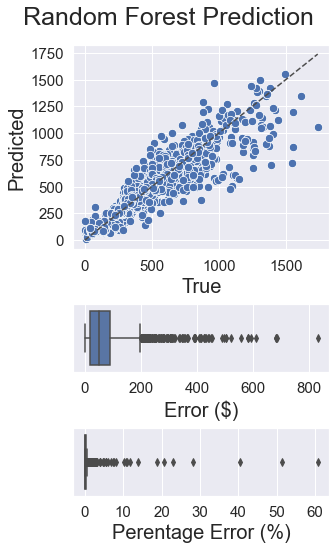

In [361]:
fig = plt.figure(constrained_layout=True, figsize=(12, 7))
gs = fig.add_gridspec(5, 3)
fig.suptitle('Random Forest Prediction', size=25, y=1.07)

# True v.s. Predicted
##################################################
fig_ax1 = fig.add_subplot(gs[0:3, 1])
sns.scatterplot(x=y_test,
                y=forest_grid.best_estimator_.predict(X_test),
                s=70);
plt.xlabel('True', size=20)
plt.ylabel('Predicted', size=20)
plt.title('', size=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], ls="--", c=".3");


# Boxplot
##################################################
forest_error = np.abs(y_test - forest_grid.best_estimator_.predict(X_test))
forest_error_percent = np.abs(y_test - forest_grid.best_estimator_.predict(X_test)) / y_test
RMSE_forest = math.sqrt(np.mean((y_test - forest_grid.best_estimator_.predict(X_test))**2))


fig_ax4 = fig.add_subplot(gs[3, 1])
sns.boxplot(x = forest_error)
plt.xlabel('Error ($)', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


fig_ax4 = fig.add_subplot(gs[4, 1])
sns.boxplot(x=forest_error_percent)
plt.xlabel('Perentage Error (%)', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

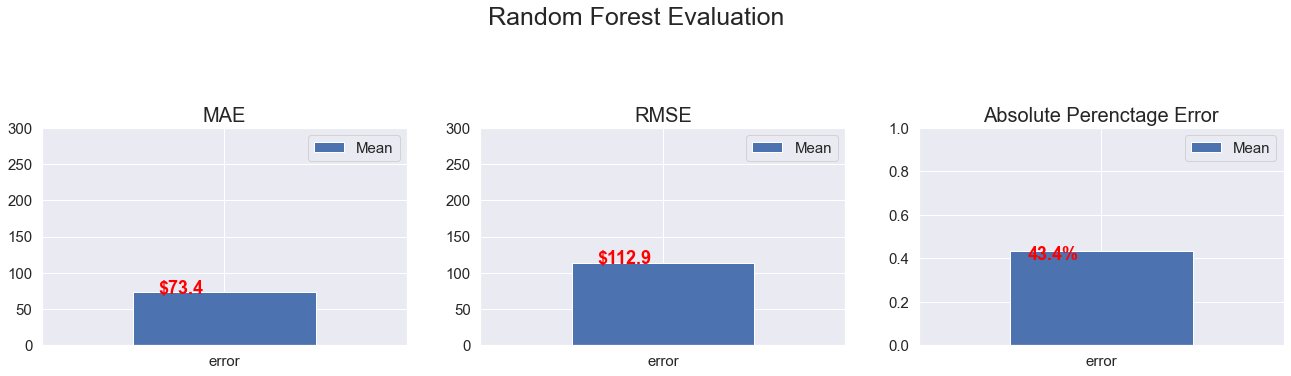

In [363]:
# Summary table
############################################################
forest_summary = pd.DataFrame({'error' : [np.mean(forest_error),
                                          np.percentile(forest_error, 95),
                                          np.mean(forest_error_percent),
                                          np.percentile(forest_error_percent, 95),
                                          RMSE_forest]})


forest_summary.rename(index={0 : 'MAE',
                             1 : '95% Confidence MAE',
                             2 : 'MAPE',
                             3 : '95% Confidence MAPE',
                             4 : 'RMSE_forest'}, inplace=True)


# Figure
############################################################
fig, axes = plt.subplots(1, 3)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
#ax1 = GLM_summary.loc[['MAE', '95% Confidence MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
ax1 = forest_summary.loc[['MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#for i, v in enumerate(GLM_summary.loc['95% Confidence MAE', :] + GLM_summary.loc['MAE',:]):
#        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18)
for i, v in enumerate(forest_summary.loc['MAE']):
        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18, color='red')
ax1.set_title('MAE', size=20)
ax1.legend(['Mean'], prop={'size': 15})
ax1.set_ylim(0, 300)
ax1.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(right=2)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
#ax1 = GLM_summary.loc[['MAE', '95% Confidence MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
ax2 = forest_summary.loc[['RMSE_forest'], :].T.plot(ax=axes[1], kind="bar", stacked=True, rot=0)

#for i, v in enumerate(GLM_summary.loc['95% Confidence MAE', :] + GLM_summary.loc['MAE',:]):
#        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18)
for i, v in enumerate(forest_summary.loc['RMSE_forest']):
        ax2.text(i-0.18, v-0.042, '${:.1f}'.format(v), fontweight='bold', size=18, color='red')
ax2.set_title('RMSE', size=20)
ax2.legend(['Mean'], prop={'size': 15})
ax2.set_ylim(0, 300)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(right=3)
#GLM_summary.loc['95% Confidence MAPE', :] = GLM_summary.loc['95% Confidence MAPE', :] - GLM_summary.loc['MAPE',:]
#mlp_summary.loc['MAPE', :] = mlp_summary.loc['MAPE ', :] - mlp_summary.loc['95% Confidence MAPE',:]
ax3 = forest_summary.loc[['MAPE'], :].T.plot(ax=axes[2], kind="bar", stacked=True, rot=0)
#for i, v in enumerate(GLM_summary.loc['95% Confidence MAPE', :] + GLM_summary.loc['MAPE',:]):
#        ax2.text(i-0.2, v-0.042, '{:.1f}%'.format(v*100), fontweight='bold', size=18)
for i, v in enumerate(forest_summary.loc['MAPE']):
        ax3.text(i-0.2, v-0.042, '{:.1f}%'.format(v*100), fontweight='bold', size=18, color='red')  
ax3.set_title('Absolute Perenctage Error', size=20)
ax3.legend(['Mean'], prop={'size': 15})
ax3.set_ylim(0, 1)
ax3.tick_params(axis='both', which='major', labelsize=15)



plt.suptitle('Random Forest Evaluation', size=25, y=1.3, x=1.5);


# Neural Network

In [365]:
data_dummies = pd.get_dummies(data_cleaned, columns=list(data_cleaned.dtypes[data.dtypes=='object'].index))
data_dummies = data_dummies[data_dummies['Total Claim Amount'] < 1800]

In [366]:
# Split into train set and test set
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(data_dummies.drop(['Total Claim Amount'], axis = 1),
                                                                data_dummies['Total Claim Amount'],
                                                                test_size = 0.2,
                                                                random_state = 42)

In [367]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_NN)
X_test_scale = scaler.fit_transform(X_test_NN)

In [ ]:
#mlp = MLPRegressor(random_state=42, max_iter=50000)
#mlp_grid = GridSearchCV(mlp,
                        #param_grid={'hidden_layer_sizes': [(5), (10), (15),
                                                           #(5, 5), (10, 10), (15, 15),
                                                           #(5, 5, 5), (10, 10, 10), (15, 15, 15)],
                                    #'alpha': [1e+01, 5e+01, 1e+02]},
                        #scoring='neg_mean_absolute_error',
                        #return_train_score=True,
                        #cv=3)

==> This search found out that the best parameters are 'hidden_layer_sizes' = (5, 5, 5) and 'alpha' =  1e+02

In [368]:
mlp = MLPRegressor(random_state=42, max_iter=50000)
mlp_grid = GridSearchCV(mlp,
                        param_grid={'hidden_layer_sizes': [(5, 5, 5)],
                                    'alpha': [1e+02]},
                        scoring='neg_mean_absolute_error',
                        return_train_score=True,
                        cv=3)

In [369]:
##### Train model with training set
mlp_grid = mlp_grid.fit(X_train_scale, y_train_NN)

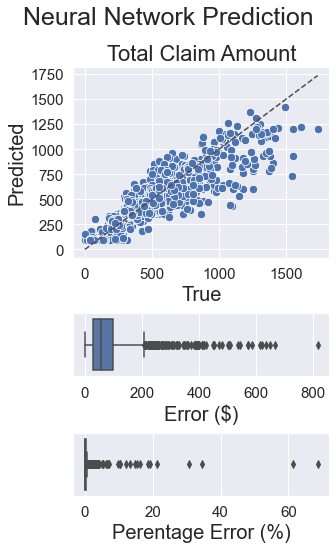

In [371]:
##### Visualize the evaluation of model

fig = plt.figure(constrained_layout=True, figsize=(12, 7))
gs = fig.add_gridspec(5, 3)
fig.suptitle('Neural Network Prediction', size=25, y=1.07)

# True v.s. Predicted
##################################################
fig_ax1 = fig.add_subplot(gs[0:3, 1])
sns.scatterplot(x=y_test_NN,
                y=mlp_grid.best_estimator_.predict(X_test_scale),
                s=70);
plt.xlabel('True', size=20)
plt.ylabel('Predicted', size=20)
plt.title('Total Claim Amount', size=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0, np.max(y_test_NN)], [0, np.max(y_test_NN)], ls="--", c=".3");


# Boxplot
##################################################
mlp_error = np.abs(y_test_NN - mlp_grid.best_estimator_.predict(X_test_scale)) # MAE
mlp_error_percent = np.abs(y_test_NN - mlp_grid.best_estimator_.predict(X_test_scale)) / y_test_NN

RMSE_NN = math.sqrt(np.mean((y_test_NN - mlp_grid.best_estimator_.predict(X_test_scale))**2))


fig_ax4 = fig.add_subplot(gs[3, 1])
sns.boxplot(x = mlp_error)
plt.xlabel('Error ($)', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


fig_ax4 = fig.add_subplot(gs[4, 1])
sns.boxplot(x=mlp_error_percent)
plt.xlabel('Perentage Error (%)', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

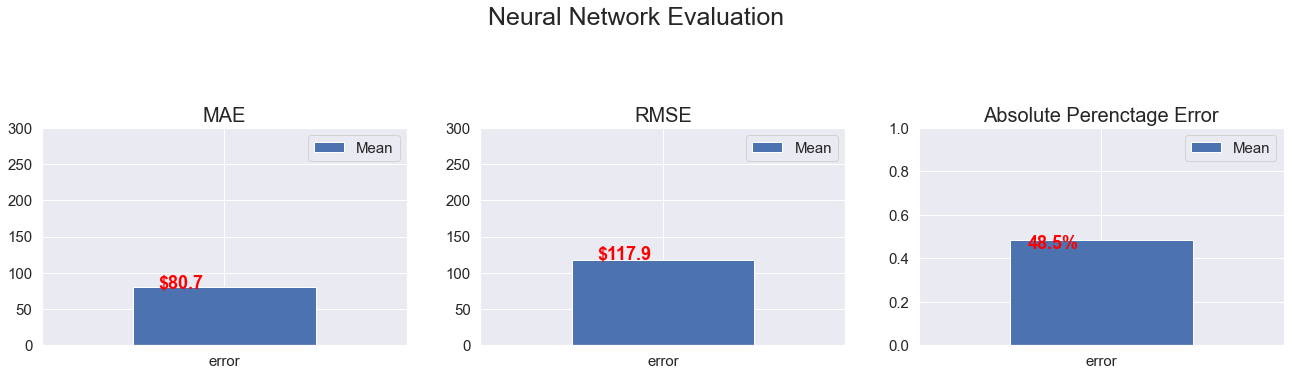

In [372]:
# Summary table
############################################################
NN_summary = pd.DataFrame({'error' : [np.mean(mlp_error),
                                      np.percentile(mlp_error, 95),
                                      np.mean(mlp_error_percent),
                                      np.percentile(mlp_error_percent, 95),
                                      RMSE_NN]})


NN_summary.rename(index={0 : 'MAE',
                         1 : '95% Confidence MAE',
                         2 : 'MAPE',
                         3 : '95% Confidence MAPE',
                         4 : 'RMSE_NN'}, inplace=True)


# Figure
############################################################
fig, axes = plt.subplots(1, 3)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
#ax1 = GLM_summary.loc[['MAE', '95% Confidence MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
ax1 = NN_summary.loc[['MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#for i, v in enumerate(GLM_summary.loc['95% Confidence MAE', :] + GLM_summary.loc['MAE',:]):
#        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18)
for i, v in enumerate(NN_summary.loc['MAE']):
        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18, color='red')
ax1.set_title('MAE', size=20)
ax1.legend(['Mean'], prop={'size': 15})
ax1.set_ylim(0, 300)
ax1.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(right=2)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
#ax1 = GLM_summary.loc[['MAE', '95% Confidence MAE'], :].T.plot(ax=axes[0], kind="bar", stacked=True, rot=0)
#GLM_summary.loc['95% Confidence MAE', :] = GLM_summary.loc['95% Confidence MAE', :] - GLM_summary.loc['MAE',:]
ax2 = NN_summary.loc[['RMSE_NN'], :].T.plot(ax=axes[1], kind="bar", stacked=True, rot=0)

#for i, v in enumerate(GLM_summary.loc['95% Confidence MAE', :] + GLM_summary.loc['MAE',:]):
#        ax1.text(i-0.18, v-2.2, '${:.1f}'.format(v), fontweight='bold', size=18)
for i, v in enumerate(NN_summary.loc['RMSE_NN']):
        ax2.text(i-0.18, v-0.042, '${:.1f}'.format(v), fontweight='bold', size=18, color='red')
ax2.set_title('RMSE', size=20)
ax2.legend(['Mean'], prop={'size': 15})
ax2.set_ylim(0, 300)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(right=3)
#GLM_summary.loc['95% Confidence MAPE', :] = GLM_summary.loc['95% Confidence MAPE', :] - GLM_summary.loc['MAPE',:]
#mlp_summary.loc['MAPE', :] = mlp_summary.loc['MAPE ', :] - mlp_summary.loc['95% Confidence MAPE',:]
ax3 = NN_summary.loc[['MAPE'], :].T.plot(ax=axes[2], kind="bar", stacked=True, rot=0)
#for i, v in enumerate(GLM_summary.loc['95% Confidence MAPE', :] + GLM_summary.loc['MAPE',:]):
#        ax2.text(i-0.2, v-0.042, '{:.1f}%'.format(v*100), fontweight='bold', size=18)
for i, v in enumerate(NN_summary.loc['MAPE']):
        ax3.text(i-0.2, v-0.042, '{:.1f}%'.format(v*100), fontweight='bold', size=18, color='red')  
ax3.set_title('Absolute Perenctage Error', size=20)
ax3.legend(['Mean'], prop={'size': 15})
ax3.set_ylim(0, 1)
ax3.tick_params(axis='both', which='major', labelsize=15)


plt.suptitle('Neural Network Evaluation', size=25, y=1.3, x=1.5);

# END